<div style="text-align: left;">
    <img src="https://numpy.org/_static/numpy_logo.png" alt="numpy logo"/>
    </div>

# Tutorial Numeric Python - numpy

<div style="text-align: right;">
    Autores: Daniela Moctezuma, Mario Graff, Sabino Miranda, Eric S. Tellez
</div>

* Manejo de arreglos multidimensionales
* Integración con librerías en C y C++
* Librerías de algebra lineal, transformada de fourier y generadores de números aletarorios

### Para usar numpy se deben de importar el paquete; por convención, se utiliza el alias _np_ en lugar de _numpy_

In [1]:
import numpy as np

# Arreglos

Así como las listas, los arreglos de numpy inician en $0$

* $\mathbf x = [3, 4, 5, 7]$
* $\mathbf x_0 = 3$
* $\mathbf x_2 = 5$

In [2]:
lst = [3, 4, 5, 7]
print(lst[0])
print(lst[2])
lst.append(32)
print(lst[-1])
lst.append('un elemento')
lst

3
5
32


[3, 4, 5, 7, 32, 'un elemento']

* Lo anterior son listas no arreglos

### ¿Por qué usar NumPy?

Porque los objetos en Python son muy ineficientes para computo científico, y requieren paquetes externos como `numpy` para paliar dicho problema en el desempeño.

Existen arreglos numéricos en Python, que ya guardan de manera eficiente arreglos de tipo homogeneo.

In [14]:
import array
print(lst)

try:
    ar = array.array('d', lst)
except TypeError as err:
    # los datos deben ser de tipo homogeneo (y 'd' indica que son números de punto flotante de doble precisión)
    print("TYPE ERROR", err)

lst.pop()
array.array('d', lst)

[3, 4, 5, 7, 32, 'un elemento']
TYPE ERROR must be real number, not str


array('d', [3.0, 4.0, 5.0, 7.0, 32.0])

### Sin embargo, numpy puede manejar arreglos multidimensionales y tiene una gran variedad de operaciones matemáticas implementadas de manera muy eficiente.

In [15]:
ar = np.array([10, 3, 4, 5, 7])
print(ar)

[10  3  4  5  7]


## Un breve recorrido por funciones de numpy

#### Mínimo

In [17]:
ar.min()
lst = [10, 3, 4, 5, 7]
min(lst), ar.min()

(3, 3)

#### Máximo

In [18]:
ar.max()

10

## Elementos únicos
#### Generar un problema simple de elementos únicos

In [19]:
import random
lst = [random.randint(0, 3) for _ in range(100)]

* ¿Cuáles son los eleméntos únicos?  
son [0, 1, 2, 3]
* ¿Cuántos de cada uno?

In [22]:
import collections
ar = np.array(lst)
np.unique(ar, return_counts=True)
collections.Counter(lst)

Counter({1: 23, 0: 20, 2: 30, 3: 27})

## Ordenar

#### Generar un problema

In [35]:
ar = np.random.rand(30)
print(ar)
ar.sort()
print(ar)

[0.72729662 0.75349944 0.81651901 0.01867029 0.72110041 0.51887622
 0.14947528 0.95034523 0.54689082 0.23816038 0.68155567 0.22648235
 0.90758111 0.86264896 0.1308884  0.60636702 0.92403365 0.35364028
 0.08219798 0.43745505 0.61055796 0.69045626 0.0984521  0.88199718
 0.09062555 0.05958364 0.36428687 0.94449612 0.76114577 0.10069666]
[0.01867029 0.05958364 0.08219798 0.09062555 0.0984521  0.10069666
 0.1308884  0.14947528 0.22648235 0.23816038 0.35364028 0.36428687
 0.43745505 0.51887622 0.54689082 0.60636702 0.61055796 0.68155567
 0.69045626 0.72110041 0.72729662 0.75349944 0.76114577 0.81651901
 0.86264896 0.88199718 0.90758111 0.92403365 0.94449612 0.95034523]


In [44]:
ar = np.random.rand(30)
index = ar.argsort()
print("permutación que ordena:", index)
b = ar[index]
print("ar ordenada:", b)

permutación que ordena: [ 6 22  8 28 10 13 20 24 29  9 16 18 26 19  2  3  1 11  5  0 25 17  4 21
 23 14 27 15 12  7]
ar ordenada: [0.03851077 0.11965891 0.13373977 0.14433144 0.15218666 0.15710475
 0.20109191 0.20779282 0.25124812 0.2605218  0.31565538 0.31964162
 0.38103078 0.41757891 0.43671129 0.46239237 0.4952705  0.49637206
 0.53041966 0.63052784 0.67707051 0.70896337 0.72995049 0.74400732
 0.85861192 0.89646211 0.91392904 0.92476988 0.94333498 0.9880695 ]


## Búsqueda en arreglos ordenados

In [45]:
c = b.searchsorted(0.15)
b[c-2:c+2]
ar.searchsorted(0.15)

0

### Media

In [46]:
np.mean(ar), np.mean(b)

(0.4845652157539036, 0.4845652157539037)

### Varianza

In [47]:
np.var(ar), np.var(b)

(0.08380879375336577, 0.08380879375336578)

# Desviación Estandar

In [48]:
np.std(ar)

0.2894974848826251

# Media geométrica

Para esto usaremos el paquete `mstats` de Scientific Python (_scipy_)

In [49]:
from scipy.stats.mstats import gmean
gmean(ar)

0.37987721409731773

### Media armónica

In [51]:
from scipy.stats.mstats import hmean
hmean(ar)

0.26161554804888115

# Generadores de números aleatorios
Para estos ejemplos vamos a usar graficación en linea usando el paquete pylab `%pylab inline`; esta instrucción sirve solo en notebooks

Populating the interactive namespace from numpy and matplotlib


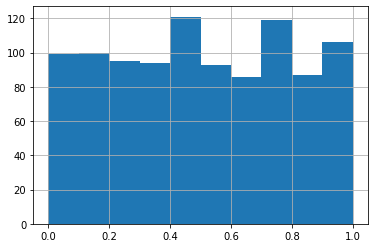

In [55]:
%pylab inline

muestra = np.random.uniform(size=1000)
_ = hist(muestra)
grid()

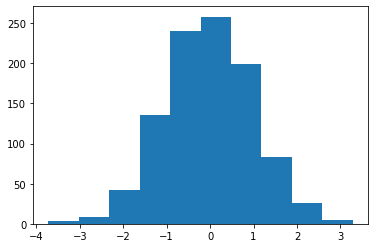

In [56]:
muestra = np.random.normal(size=1000)
_ = hist(muestra)

In [57]:
np.mean(muestra), muestra.min(), muestra.max(), np.std(muestra)

(-0.026820415976755725,
 -3.7231208726108016,
 3.2855977387474313,
 1.0076079422341668)

## Estadísticas del titanic

numpy tiene funciones para leer matrices de números

In [60]:
header = open('Titanic_codificado_train.csv').readline().strip().split(',')
print(header, len(header))
titanic = np.loadtxt('Titanic_codificado_train.csv',
                     delimiter=',', skiprows=1)
clase = titanic[:, 2]  # : => acceder a la todos los elementos de la columna 2
data = titanic[:, 3:]
print(header[3:])

['', 'PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Lname', 'NamePrefix'] 12
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Lname', 'NamePrefix']


## Sobrevivientes

In [62]:
_, c = np.unique(clase, return_counts=True)
print((_, c))
c / c.sum()

(array([0., 1.]), array([549, 342]))


array([0.61616162, 0.38383838])

## Sexo

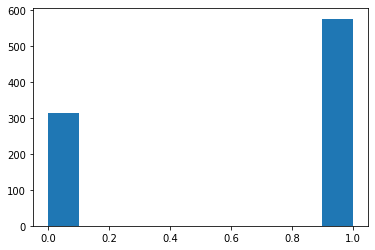

In [63]:
_ = hist(data[:, 1])

## Edad

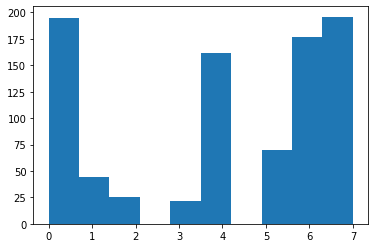

In [64]:
_ = hist(data[:, 2])

### Selección de elementos

Los arreglos de numpy se puede acceder por máscaras, esto es, arreglos de elementos booleanos que se corresponden uno a uno con los elementos del arreglo

* ¿Cuántas mujeres sobrevivieron?
* ¿Cuáles eran sus edades?

In [76]:
genero = data[:, 1]
mask = genero == 0
print("máscara:", np.unique(mask, return_counts=True))
_, count = np.unique(clase[mask], return_counts=True)
print(count / count.sum())
print("las máscaras son arreglos de boolearnos, por lo que estan sujetas a operaciones booleanas")
_, count = np.unique(clase[~mask], return_counts=True) # ~ => negación de los elementos de la máscara
print(count / count.sum())

máscara: (array([False,  True]), array([577, 314]))
[0.25796178 0.74203822]
las máscaras son arreglos de boolearnos, por lo que estan sujetas a operaciones booleanas
[0.81109185 0.18890815]


(array([16.,  5.,  8.,  0.,  0., 13.,  0.,  9., 17., 13.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

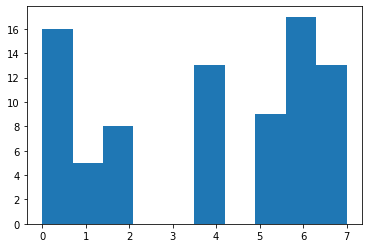

In [77]:
edad = data[:, 2]
edad_mujer = edad[mask]
clase_mujer = clase[mask]
hist(edad_mujer[clase_mujer == 0])

[0. 7. 7. 7. 5. 1. 0. 5. 0. 7. 6. 5. 2. 0. 6. 6. 6. 5. 5. 0. 7. 1. 4. 6.
 5. 0. 7. 4. 1. 0. 7. 5. 5. 7. 6. 5. 7. 4. 7. 7. 4. 6. 5. 4. 5. 1. 7. 6.
 0. 7. 4. 6. 4. 4. 2. 4. 5. 0. 6. 0. 1. 0. 6. 1. 6. 7. 4. 0. 0. 6. 4. 1.
 5. 7. 7. 7. 7. 6. 7. 1. 6. 2. 6. 6. 4. 4. 7. 0. 7. 6. 7. 7. 0. 6. 0. 7.
 0. 6. 3. 0. 7. 4. 7. 4. 4. 1. 0. 6. 6. 6. 5. 7. 4. 5. 7. 7. 4. 7. 0. 7.
 4. 0. 0. 7. 5. 6. 6. 0. 4. 4. 0. 6. 4. 0. 6. 6. 0. 0. 6. 6. 4. 1. 6. 4.
 0. 1. 7. 0. 5. 4. 4. 7. 7. 4. 4. 6. 7. 6. 7. 5. 2. 7. 7. 4. 6. 0. 5. 4.
 4. 0. 7. 5. 1. 6. 0. 1. 7. 4. 4. 1. 3. 6. 7. 0. 4. 4. 6. 0. 5. 7. 0. 7.
 0. 7. 0. 0. 1. 6. 7. 2. 7. 4. 0. 2. 2. 4. 4. 0. 0. 0. 6. 7. 0. 6. 7. 0.
 6. 4. 0. 5. 0. 6. 6. 4. 4. 0. 0. 6. 4. 7. 1. 4. 2. 7. 0. 4. 1. 1. 4. 5.
 6. 5. 7. 6. 0. 5. 0. 6. 5. 1. 6. 5. 5. 0. 4. 4. 0. 7. 2. 7. 6. 4. 7. 0.
 4. 7. 1. 0. 7. 0. 0. 7. 0. 0. 1. 0. 5. 5. 5. 6. 0. 7. 7. 7. 5. 7. 2. 4.
 0. 7. 3. 5. 0. 7. 6. 2. 5. 0. 5. 0. 4. 0. 6. 0. 7. 0. 7. 5. 0. 4. 4. 0.
 4. 6.]


(array([54., 16.,  3.,  0.,  3., 41.,  0., 27., 36., 53.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

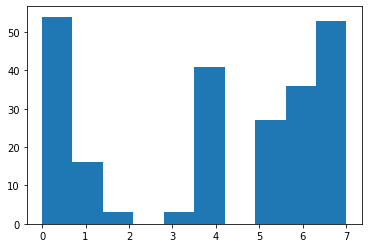

In [78]:
print(edad_mujer)
hist(edad_mujer[clase_mujer == 1])

In [79]:
a, b = 12, -23
a, b
c = np.array([12, -23])
a, b = c
a, b

(12, -23)

### Vectores - suma

In [80]:
import numpy as np
a = np.random.uniform(size=10)
np.set_printoptions(precision=2)
b = np.random.uniform(size=10)
c = a + b
print(a[:3], b[:3], a + b)

[0.62 0.13 0.26] [0.35 0.16 0.43] [0.97 0.28 0.69 0.84 0.41 0.75 1.07 1.31 1.33 0.9 ]


### Vectores - producto
* $\mathsf{dot}(\mathbf a, \mathbf b) = \sum_i \mathbf a_i \mathbf b_i$

In [81]:
np.dot(a, b)

1.6215978353353409

### Arreglos - producto

* $\mathbf c_i = \mathbf a_i \mathbf b_i$

In [82]:
a * b

array([0.22, 0.02, 0.11, 0.  , 0.04, 0.03, 0.26, 0.41, 0.44, 0.09])

### Minkowski

* $D(a, b) = \left( \sum_i^n \left| a_i - b_i \right|^p \right)^{\frac{1}{p}}$
* La distancia Manhattan se define con $p=1$
* La distancia Euclideana se define con $p=2$
* La distancia de Chebyshev se define con $p \rightarrow \infty$

### $p \rightarrow \infty$
* $d(a, b) = \max_i \mid a_i - b_i \mid$

In [83]:
print(np.fabs(a - b).max())

0.8412986149659751


###  $p \rightarrow -\infty$
* $d(a, b) = \min_i \mid a_i - b_i \mid$

In [84]:
print(np.fabs(a - b).min())

0.03028859056073052


### Euclideana

In [85]:
np.sqrt(((a - b)**2).sum())

1.3700373935370396

## Norma

* $|| \mathcal a || = \sqrt{\sum_i \mathcal a_i^2}$ 

In [86]:
c = (a)**2
c = c.sum()
print(np.sqrt(c))

1.9791989877821519


In [88]:
#### sin embargo, siempre vamos a preferir la ejecución de menos operaciones en python a favor de funciones de numpy

In [87]:
c = np.dot(a, a)
print(np.sqrt(c))

1.979198987782152


### Similaridad coseno

* $s(\mathbf a, \mathbf b) = \cos(\theta) = \frac{\mathbf a \cdot \mathbf b}{\mid \mid \mathbf a \mid \mid ~ \mid \mid \mathbf b \mid \mid}$

In [89]:
norm = lambda x: np.sqrt(np.dot(x, x))
print(np.dot(a, b) / (norm(a) * norm(b)))
print(np.dot(a, a) / (norm(a) * norm(a)))

0.7470099526339222
0.9999999999999999


### Índice Jaccard
* $j(\mathbf a, \mathbf b) = \frac{\mid \mathbf a \cap \mathbf b \mid}{\mid \mathbf a \cup \mathbf b \mid}$

In [90]:
a = np.random.randint(0, 2, size=10)
b = np.random.randint(0, 2, size=10)
_ = a + b
_[_ > 1] = 1
print(np.dot(a, b) / _.sum())
print(np.dot(a, b) / ((a + b) >= 1).sum())

0.16666666666666666
0.16666666666666666


## Regresión lineal

* $y = m x + b$
* $A \mathbf x = \mathbf y$
* $A' A \mathbf x = A' \mathbf y $
* $(A' A)^{-1} A' A \mathbf x = ( A' A)^{-1} A' \mathbf y $
* $\mathbf x = ( A' A)^{-1} A' \mathbf y $

In [91]:
from sklearn import datasets
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [92]:
boston.data[10]

array([2.25e-01, 1.25e+01, 7.87e+00, 0.00e+00, 5.24e-01, 6.38e+00,
       9.43e+01, 6.35e+00, 5.00e+00, 3.11e+02, 1.52e+01, 3.93e+02,
       2.04e+01])

In [95]:
coef = np.linalg.lstsq(boston.data, boston.target, rcond=None)[0]
print(coef, boston.data[10])
np.dot(coef, boston.data[10]), boston.target[10]

[-9.29e-02  4.87e-02 -4.06e-03  2.85e+00 -2.87e+00  5.93e+00 -7.27e-03
 -9.69e-01  1.71e-01 -9.40e-03 -3.92e-01  1.49e-02 -4.16e-01] [2.25e-01 1.25e+01 7.87e+00 0.00e+00 5.24e-01 6.38e+00 9.43e+01 6.35e+00
 5.00e+00 3.11e+02 1.52e+01 3.93e+02 2.04e+01]


(19.33401835194541, 15.0)

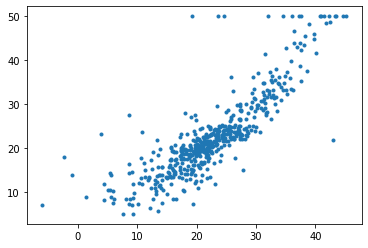

In [110]:
pred = np.dot(boston.data, coef)
plot(pred, boston.target, '.')

In [112]:
### ¿cómo se veria una predicción aleatoria?

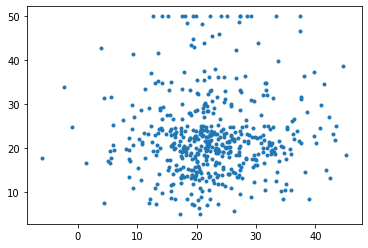

In [113]:
y = boston.target.copy()
np.random.shuffle(y)
plot(np.dot(boston.data, coef), y, '.')

# Ejercicios
- Cree un notebook de Jupyter
- Lea el conjunto de datos `Titanic_codificado_train.csv`
- Cálcule la matriz de distancias euclideas (i.e., todos los elementos vs todos los elementos) del conjunto de datos
- Determine la distancia mínima y la distancia máxima por elemento; determine los valores promedios, la desviación estandar tanto de las de las distancias mínimás como de las distancias máximas.